In [416]:
import numpy as np
# node 1 leader, node 2,3,4,5,6 followers
A = np.array([[0, 1, 1, 0, 0], #2 connected to 2,3
              [1, 0, 0, 1, 0], #3 connected to 2,5
              [1, 0, 0, 1, 0], #4 connected to 2,5
              [0, 1, 1, 0, 1], #5 connected to 3,4,6
              [0, 0, 0, 1, 0]]) #6 connected to 5
D = np.diag(np.sum(A, axis=1))
L_F = D - A # laplacian

#node 2 and 3 are connected to the leader
B = np.array([[1], #node 2 connected to leader
             [0], #node 3 not connected to leader
             [0], #node 4 not connected to leader
             [0], #node 5 not connected to leader
             [0]]) #node 6 not connected to leader

Dpin = np.diag(np.sum(B, axis=1))

KF = 1.0
KL = 1.0

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)

print(M)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [417]:
# node 1 leader, node 7 leader, node 2,3,4,5,6 followers
A = np.array([[0, 1, 1, 0, 0], #2 connected to 3,4
              [1, 0, 0, 1, 0], #3 connected to 2,5
              [1, 0, 0, 1, 0], #4 connected to 2,5
              [0, 1, 1, 0, 1], #5 connected to 3,4,6
              [0, 0, 0, 1, 0]]) #6 connected to 5
 

D = np.diag(np.sum(A, axis=1))
L_F = D - A # laplacian

#node 2 and 3 are connected to the leader
B = np.array([[1,0], #node 2 connected to leader1 (node 1)
             [0,0], #node 3 not connected to leader
             [0,0], #node 4 not connected to leader
             [0,0], #node 5 not connected to leader
             [0,1]]) #node 6 not connected to leader2 (node 7)

Dpin = np.diag(np.sum(B, axis=1))

KF = 1.0
KL = 1.0

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)

print(M)

[[0.75  0.25 ]
 [0.625 0.375]
 [0.625 0.375]
 [0.5   0.5  ]
 [0.25  0.75 ]]


In [418]:
import numpy as np
# node 1 leader, node 7 leader,node 8 leader node 2,3,4,5,6 followers
A = np.array([[0, 1, 1, 0, 0], #2 connected to 3,4
              [1, 0, 0, 1, 0], #3 connected to 2,5
              [1, 0, 0, 1, 0], #4 connected to 2,5
              [0, 1, 1, 0, 1], #5 connected to 3,4,6
              [0, 0, 0, 1, 0]]) #6 connected to 5
 

D = np.diag(np.sum(A, axis=1))
L_F = D - A # laplacian

#node 2 and 3 are connected to the leader
B = np.array([[1,0,0], #node 2 connected to leader1 (node 1)
             [0,0,0], #node 3 not connected a leader
             [0,0,1], #node 4 connected to leader3 (node 8)
             [0,0,0], #node 5  connected to leader
             [0,1,0]]) #node 6 not connected to leader2 (node 7)

Dpin = np.diag(np.sum(B, axis=1))

KF = 1.0
KL = 1.0

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)

print(M)

[[0.57142857 0.14285714 0.28571429]
 [0.42857143 0.25714286 0.31428571]
 [0.28571429 0.17142857 0.54285714]
 [0.28571429 0.37142857 0.34285714]
 [0.14285714 0.68571429 0.17142857]]


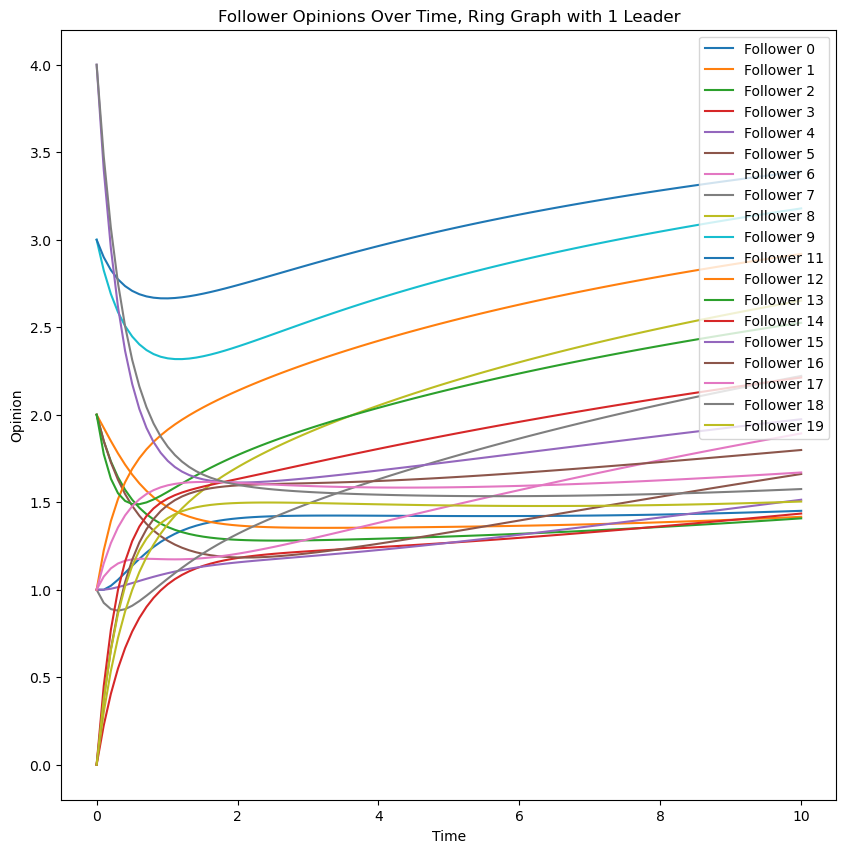

[10] [[5]]


In [419]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# nx.draw(G, with_labels=True)
# plt.show()

def ring(n):
    G = nx.cycle_graph(n)
    A = nx.adjacency_matrix(G).toarray()
    return G, A

n = 20
G, A = ring(n)

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        left = (leader - 1) % n
        right = (leader + 1) % n
        if left in followers:
            idxL = followers.index(left)
            B[idxL,i] = 1
        if right in followers:
            idxR = followers.index(right)
            B[idxR,i] = 1
    return B

AF, leaders, followers = leader(A, 1) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF

Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[5]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Ring Graph with 1 Leader')
plt.savefig('graph1.png')
plt.show()
print(leaders, r)

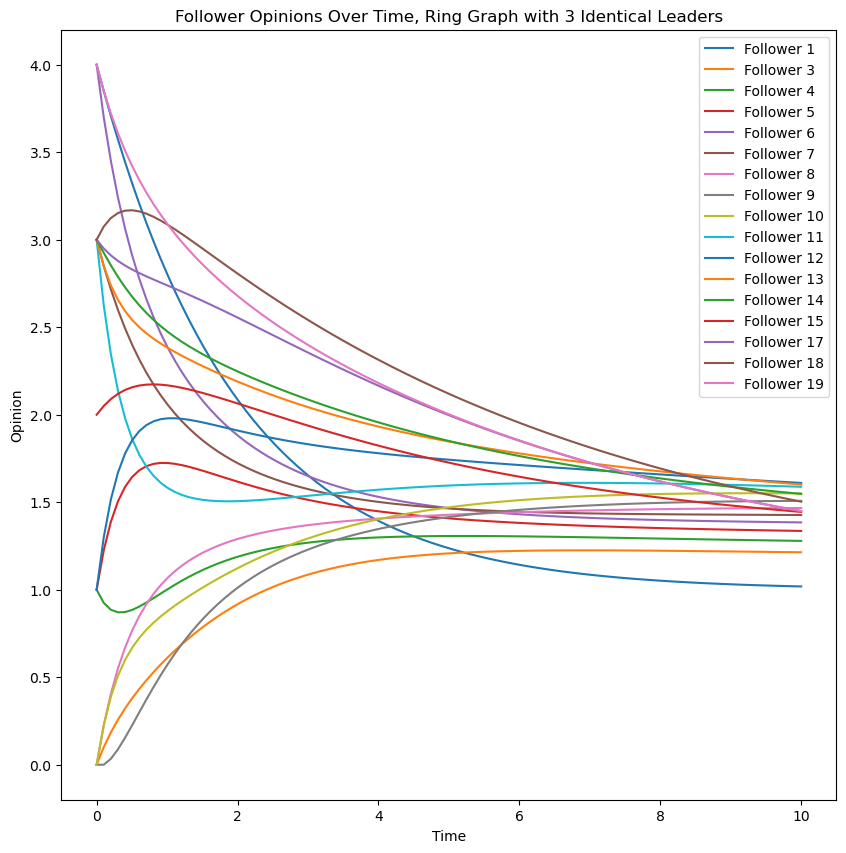

[2, 16, 0] [[1]
 [1]
 [1]]


In [420]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# nx.draw(G, with_labels=True)
# plt.show()

def ring(n): #ring matrix from networkx
    G = nx.cycle_graph(n)
    A = nx.adjacency_matrix(G).toarray() #gives us the adjacency matrix in a big array
    return G, A

n = 20
G, A = ring(n)

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders and setting the neighbors to 1
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        left = (leader - 1) % n
        right = (leader + 1) % n
        if left in followers: 
            idxL = followers.index(left)
            B[idxL,i] = 1
        if right in followers:
            idxR = followers.index(right)
            B[idxR,i] = 1
    return B

AF, leaders, followers = leader(A, 3) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF

Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[1],[1],[1]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Ring Graph with 3 Identical Leaders')
plt.savefig('graph2.png')
plt.show()
print(leaders, r)

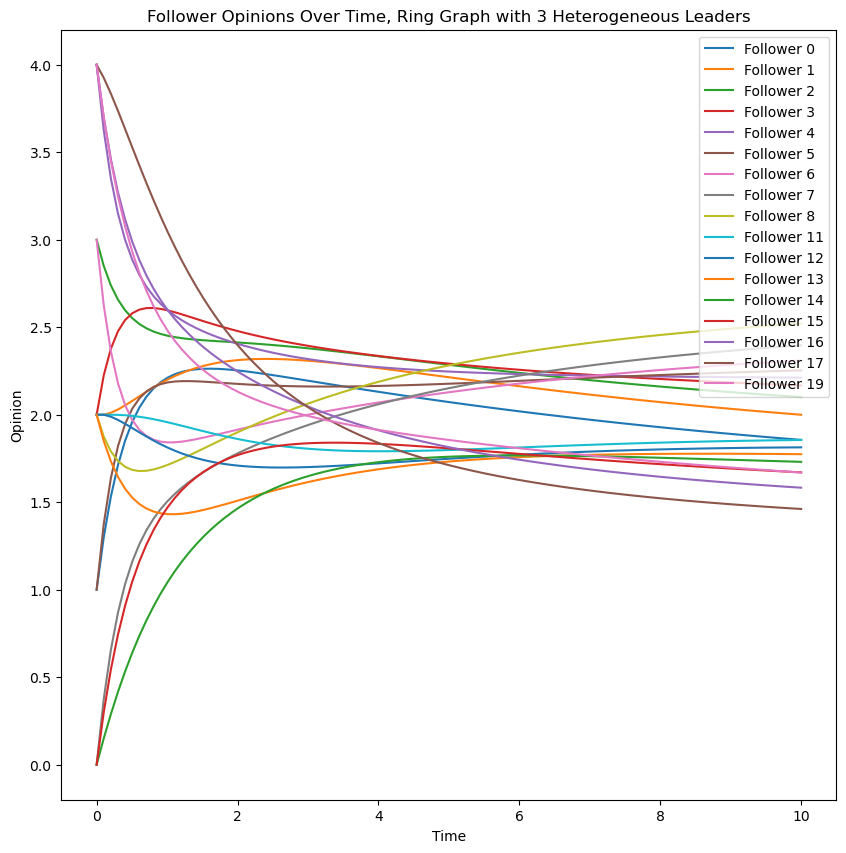

[18, 10, 9] [[1]
 [2]
 [3]]


In [421]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# nx.draw(G, with_labels=True)
# plt.show()

def ring(n):
    G = nx.cycle_graph(n)
    A = nx.adjacency_matrix(G).toarray()
    return G, A

n = 20
G, A = ring(n)

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        left = (leader - 1) % n
        right = (leader + 1) % n
        if left in followers:
            idxL = followers.index(left)
            B[idxL,i] = 1
        if right in followers:
            idxR = followers.index(right)
            B[idxR,i] = 1
    return B

AF, leaders, followers = leader(A, 3) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF

Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[1],[2],[3]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Ring Graph with 3 Heterogeneous Leaders')
plt.savefig('graph3.png')
plt.show()
print(leaders, r)

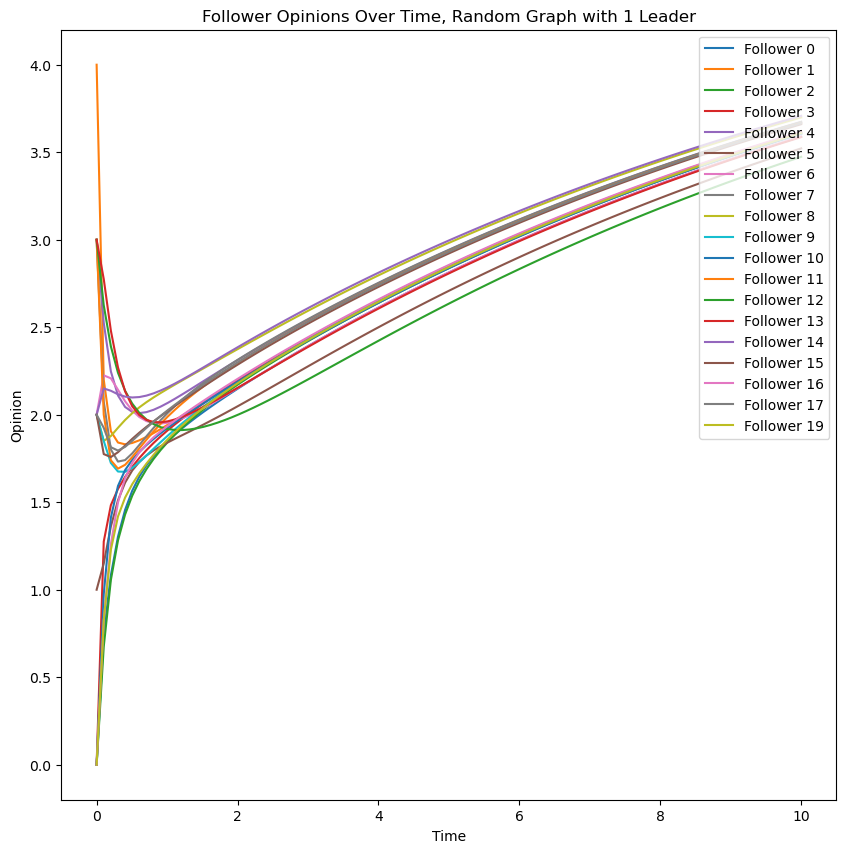

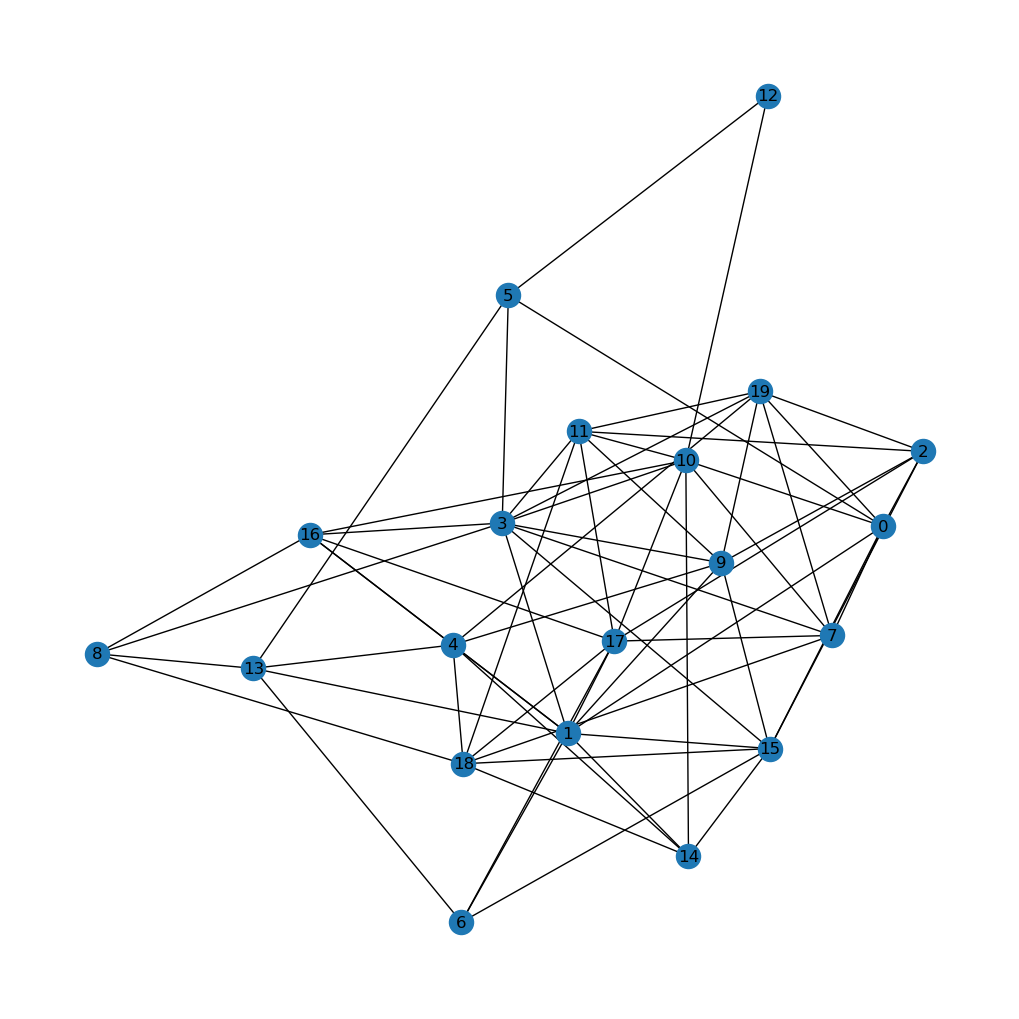

[18] [[5]]


In [422]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random



def graph(n):
    G = nx.erdos_renyi_graph(n, 0.33)
    A = nx.adjacency_matrix(G).toarray()
    return G, A

n = 20
G, A = graph(n)
# nx.draw(G, with_labels=True)
# plt.show()

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        neighbors = G.neighbors(leader)
        for neighbor in neighbors:
            if neighbor in followers:
                idx = followers.index(neighbor)
                B[idx,i] = 1
    return B

AF, leaders, followers = leader(A, 1) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF


Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[5]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Random Graph with 1 Leader')
plt.savefig('graph4.png')
plt.show()

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.savefig('graph7.png')
plt.show()
print(leaders, r)

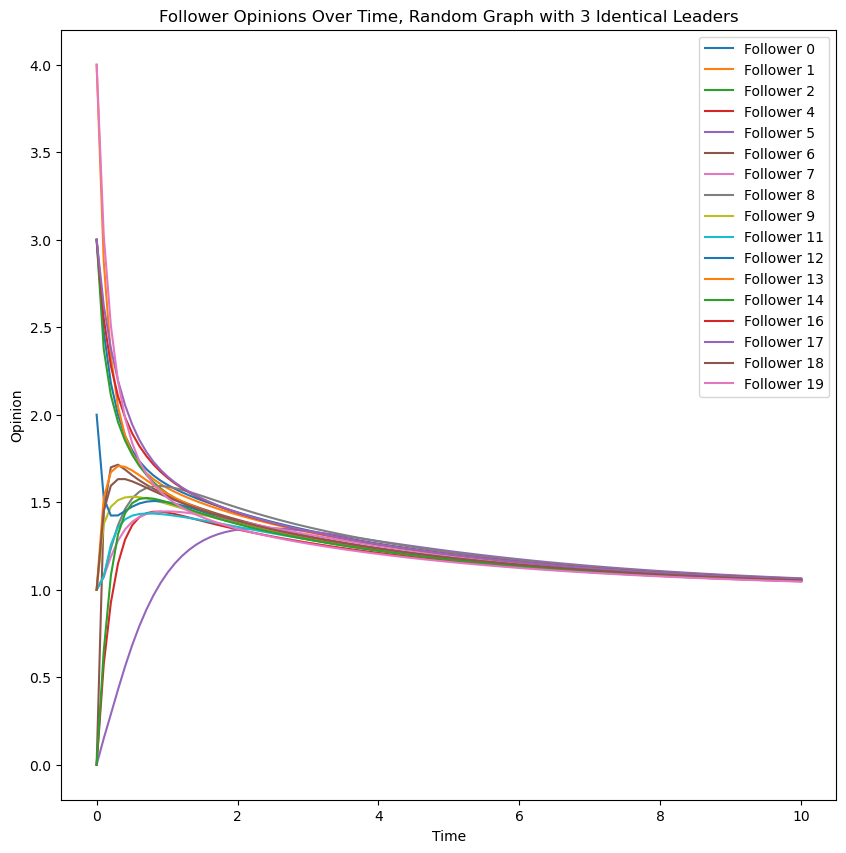

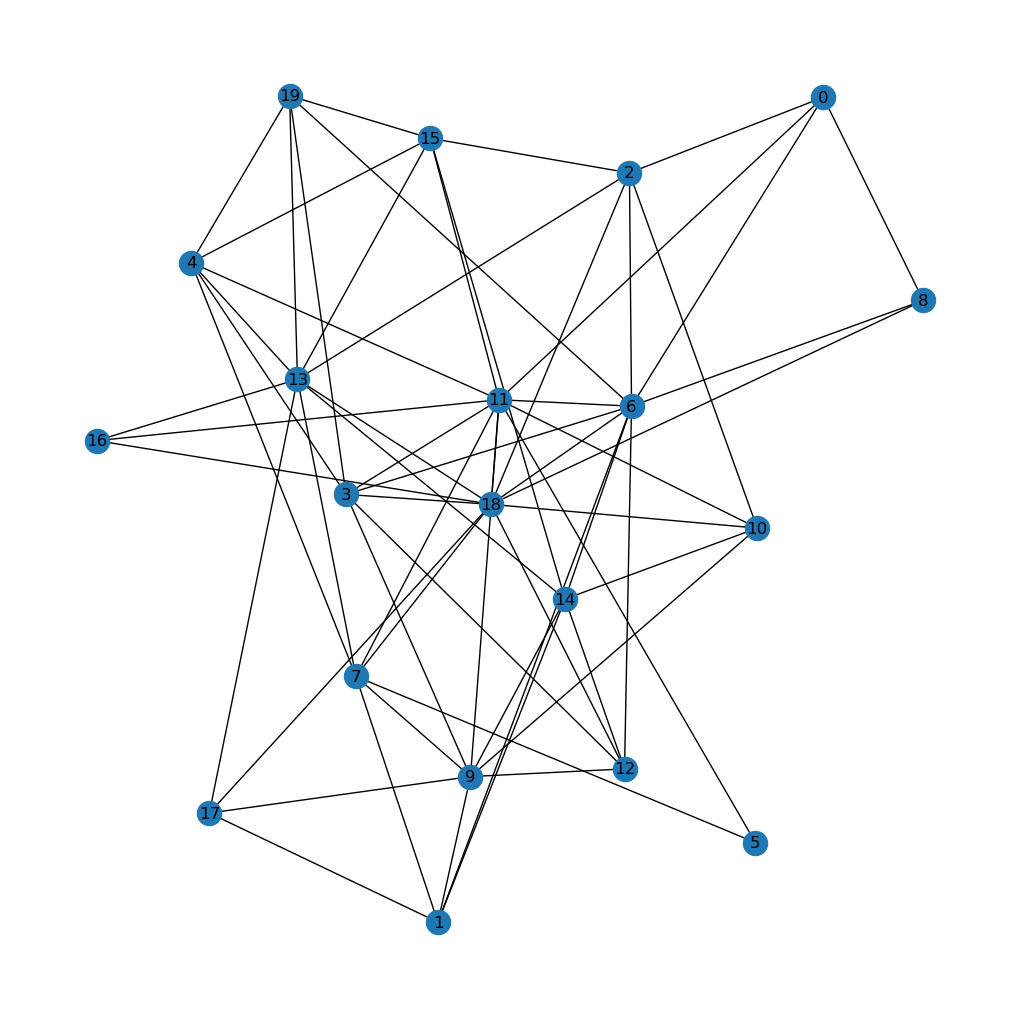

[10, 15, 3] [[1]
 [1]
 [1]]


In [423]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random



def graph(n):
    G = nx.erdos_renyi_graph(n, 0.33)
    A = nx.adjacency_matrix(G).toarray()
    return G, A

n = 20
G, A = graph(n)
# nx.draw(G, with_labels=True)
# plt.show()

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        neighbors = G.neighbors(leader)
        for neighbor in neighbors:
            if neighbor in followers:
                idx = followers.index(neighbor)
                B[idx,i] = 1
    return B

AF, leaders, followers = leader(A, 3) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF


Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[1],[1],[1]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Random Graph with 3 Identical Leaders')
plt.savefig('graph5.png')
plt.show()

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.savefig('graph8.png')
plt.show()
print(leaders, r)

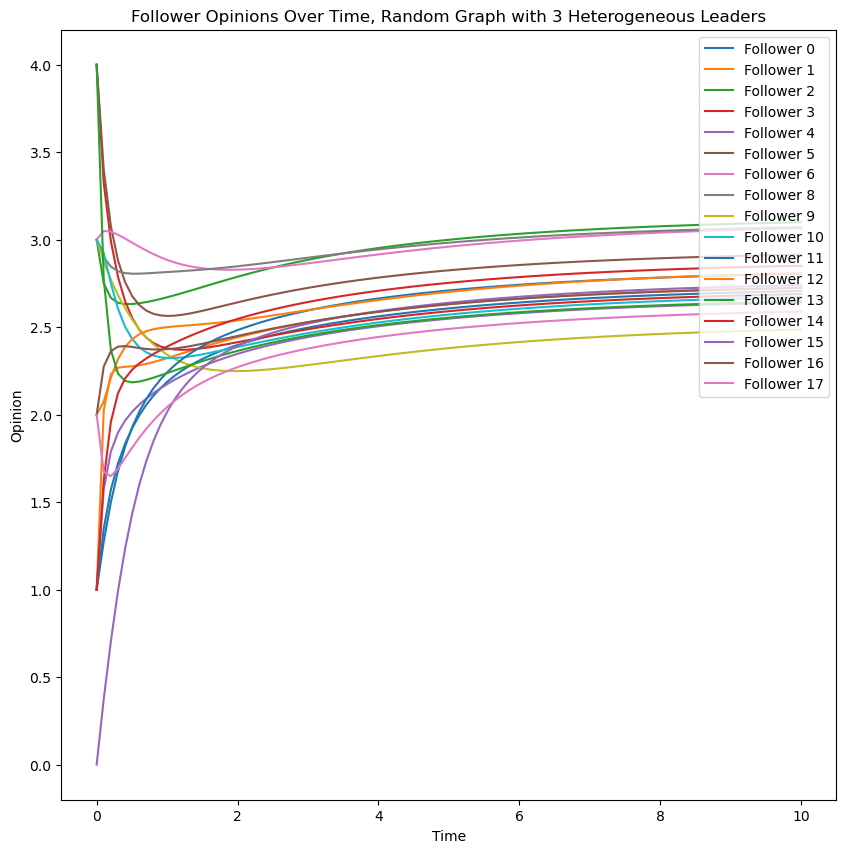

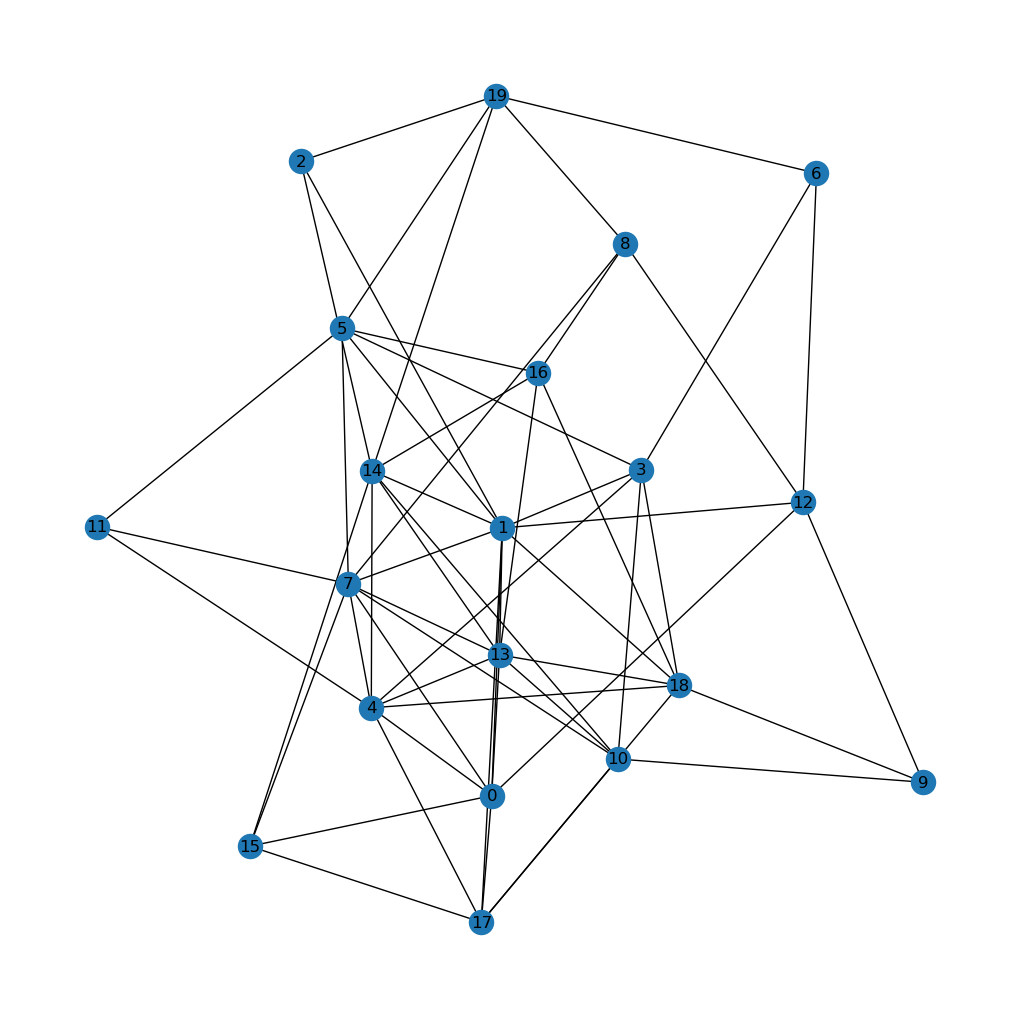

[18, 7, 19] [[1]
 [3]
 [5]]


In [424]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random



def graph(n):
    G = nx.erdos_renyi_graph(n, 0.33)
    A = nx.adjacency_matrix(G).toarray()
    return G, A

n = 20
G, A = graph(n)
# nx.draw(G, with_labels=True)
# plt.show()

def leader(AF, n): #removes the rows and columns of leaders from adjacency matrix
    leaders = []
    followers = list(range(AF.shape[0]))
    for i in range(n):
        pos = random.choice(range(len(followers)))
        leader = followers[pos]
        followers.remove(followers[pos])
        AF = np.delete(AF, pos, axis=0)
        AF = np.delete(AF, pos, axis=1)
        leaders.append(leader)

    return AF, leaders, followers

def pop(n, leaders, followers): #init B matrix for n leaders
    B = np.zeros((len(followers),len(leaders)))
    for i,leader in enumerate(leaders):
        neighbors = G.neighbors(leader)
        for neighbor in neighbors:
            if neighbor in followers:
                idx = followers.index(neighbor)
                B[idx,i] = 1
    return B

AF, leaders, followers = leader(A, 3) 
B = pop(n, leaders, followers)
D = np.diag(np.sum(AF, axis=1))
L_F = D - AF


Dpin = np.diag(np.sum(B, axis=1))

KF = 0.75
KL = 0.25

term1 = np.linalg.inv(KF*L_F + KL*Dpin)
term2 = KL*B
M = np.matmul(term1, term2)
r = np.array([[1],[3],[5]])

eq = np.matmul(M, r)
#print(f"\n Matrix M: \n{M}\n")
#print(f"Final Follower Opinions: \n{eq}\n")
#print("Leaders:", leaders)

def roc(L_F, Dpin,B, r, KF, KL, followers, leaders, t=10, dt=0.1):
    tvals = np.linspace(0, t, int(t/dt))
    xvals = []
    x = np.random.randint(0, 5, (len(followers), 1))
    for i in range(len(tvals)): #eq 2 from the hw
        xvals.append(x)
        term1 = -(KF*L_F + KL*Dpin)
        term2 = x
        term3 = KL*np.matmul(B, r)
        dx = np.matmul(term1, term2) + term3
        x = x + dt*dx
    xvals = np.array(xvals).reshape(len(tvals), len(followers)).T # makes it easy for plotting. shape = number of followers x number of time pts
    return xvals, tvals

xvals, tvals = roc(L_F, Dpin, B, r, KF, KL, followers, leaders, t=10, dt=0.1)

plt.figure(figsize=(10,10))
for i in range(len(followers)):
    plt.plot(tvals, xvals[i,:], label=f'Follower {followers[i]}')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Follower Opinions Over Time, Random Graph with 3 Heterogeneous Leaders')
plt.savefig('graph6.png')
plt.show()

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.savefig('graph9.png')
plt.show()
print(leaders, r)